In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from hpcom.channel import create_channel_parameters, full_line_model_default, full_line_model_wdm, full_line_model, full_line_model_back_to_back
from hpcom.signal import create_wdm_parameters, generate_wdm, nonlinear_shift

import plotly.graph_objects as go


2023-07-18 16:18:25.704736: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [18]:
import timeit

In [2]:
import hpcom
from importlib import reload
reload(hpcom)

<module 'hpcom' from '/home/esf0/PycharmProjects/hpcom/hpcom/__init__.py'>

In [49]:
# create parameters
wdm = create_wdm_parameters(n_channels=1, p_ave_dbm=-5, n_symbols=2 ** 20, m_order=64, roll_off=0.1, upsampling=16,
                            downsampling_rate=1, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2)


channel = create_channel_parameters(n_spans=2,
                                    z_span=80,
                                    alpha_db=0.0,
                                    gamma=1.2,
                                    noise_figure_db=-200,
                                    dispersion_parameter=16.8,
                                    dz=5)

propagation took 1072.98 ms
search x and y points took 62.079 ms
ber for x and y took 116.82900000000001 ms
BER (x / y): (1.1444091796875e-05, 3) (3.4332275390625e-05, 9)
Q^2-factor (x / y): 4.234675636996476 3.980866347708104
DBP 1 propagation took 245.833 ms
search x and y points took 61.877 ms
ber for x and y took 116.45700000000001 ms
DBP 2 propagation took 252.44100000000003 ms
search x and y points took 61.464 ms
ber for x and y took 114.824 ms
DBP 3 propagation took 262.98 ms
search x and y points took 62.763 ms
ber for x and y took 115.182 ms
DBP 10 propagation took 336.018 ms
search x and y points took 61.961000000000006 ms
ber for x and y took 115.286 ms
all took 3304.6890000000003 ms
propagation took 914.735 ms
search x and y points took 62.72800000000001 ms
ber for x and y took 113.05999999999999 ms
BER (x / y): (3.814697265625e-05, 10) (6.103515625e-05, 16)
Q^2-factor (x / y): 3.9557530379304953 3.8419306855019117
DBP 1 propagation took 239.44 ms
search x and y points took

In [51]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')), tf.config.list_physical_devices('GPU'))

In [5]:
from datetime import datetime

In [12]:
%%timeit
# tf.config.list_physical_devices('CPU')

with tf.device('/CPU:0'):
    result = full_line_model(channel, wdm, verbose=2)

KeyboardInterrupt: 

In [30]:
%%timeit

with tf.device('/GPU:0'):
    start_time = datetime.now()
    result = full_line_model(channel, wdm, verbose=2)
    print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")

propagation took 1267.986 ms
search x and y points took 62.491 ms
ber for x and y took 112.774 ms
BER (x / y): (0.06911849975585938, 18119) (0.06923675537109375, 18150)
Q^2-factor (x / y): 1.4823883218328422 1.48149952746268
DBP 1 propagation took 294.02299999999997 ms
search x and y points took 63.592999999999996 ms
ber for x and y took 112.078 ms
DBP 2 propagation took 302.13 ms
search x and y points took 62.064 ms
ber for x and y took 112.411 ms
DBP 3 propagation took 313.169 ms
search x and y points took 61.925000000000004 ms
ber for x and y took 112.613 ms
DBP 10 propagation took 380.697 ms
search x and y points took 62.103 ms
ber for x and y took 112.196 ms
all took 3665.465 ms
-=-=-=-=-=-=-
propagation took 1091.2569999999998 ms
WDM channel 0
search x and y points took 61.751 ms
ber for x and y took 113.052 ms
BER (x / y): (0.06870269775390625, 18010) (0.06888580322265625, 18058)
Q^2-factor (x / y): 1.4855227726642124 1.4841406671168693
all took 1521.714 ms


In [52]:
for n_s_cur in [2**10, 2**11, 2**12, 2**13, 2**14, 2**15, 2**16, 2**17, 2**18, 2**19, 2**20, 2**21, 2**22]:
    for n_spans_cur in [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]:
        print("n_s", n_s_cur, "n_spans", n_spans_cur)
        wdm = create_wdm_parameters(n_channels=1, p_ave_dbm=-5, n_symbols=n_s_cur, m_order=64, roll_off=0.1, upsampling=16,
                                    downsampling_rate=1, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2)


        channel = create_channel_parameters(n_spans=n_spans_cur,
                                            z_span=80,
                                            alpha_db=0.0,
                                            gamma=1.2,
                                            noise_figure_db=-200,
                                            dispersion_parameter=16.8,
                                            dz=5)

        with tf.device('/GPU:0'):
            start_time = datetime.now()
            _ = full_line_model(channel, wdm, verbose=2)
            print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")

        with tf.device('/CPU:0'):
            start_time = datetime.now()
            _ = full_line_model(channel, wdm, verbose=2)
            print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")

propagation took 1278.532 ms
search x and y points took 62.944 ms
ber for x and y took 114.33200000000001 ms
BER (x / y): (0.01612091064453125, 4226) (0.0164794921875, 4320)
Q^2-factor (x / y): 2.141399673061334 2.1325825704122314
DBP 1 propagation took 298.265 ms
search x and y points took 62.855999999999995 ms
ber for x and y took 114.105 ms
DBP 2 propagation took 307.556 ms
search x and y points took 62.558 ms
ber for x and y took 113.66900000000001 ms
DBP 3 propagation took 326.27099999999996 ms
search x and y points took 56.567 ms
ber for x and y took 119.695 ms
DBP 10 propagation took 392.942 ms
search x and y points took 62.056 ms
ber for x and y took 114.613 ms
all took 3724.117 ms
-=-=-=-=-=-=-
propagation took 1113.211 ms
WDM channel 0
search x and y points took 63.156000000000006 ms
ber for x and y took 118.085 ms
BER (x / y): (0.015979766845703125, 4189) (0.016300201416015625, 4273)
Q^2-factor (x / y): 2.144916375635556 2.136970355586611
all took 1582.944 ms


In [31]:
for n_s_cur in [2**20]:
    for n_spans_cur in [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]:
        print("n_s", n_s_cur, "n_spans", n_spans_cur)
        wdm = create_wdm_parameters(n_channels=1, p_ave_dbm=-5, n_symbols=n_s_cur, m_order=64, roll_off=0.1, upsampling=16,
                                    downsampling_rate=1, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2)


        channel = create_channel_parameters(n_spans=n_spans_cur,
                                            z_span=80,
                                            alpha_db=0.0,
                                            gamma=1.2,
                                            noise_figure_db=-200,
                                            dispersion_parameter=16.8,
                                            dz=5)

        with tf.device('/GPU:0'):
            start_time = datetime.now()
            _ = full_line_model(channel, wdm, verbose=2)
            print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")

        with tf.device('/CPU:0'):
            start_time = datetime.now()
            _ = full_line_model(channel, wdm, verbose=2)
            print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")

[(0.003025054931640625, 793), (1.1444091796875e-05, 3), (0.0, 0), (0.0, 0)]


In [64]:
# data = [
#     {"n_symbols": 2**10, "n_spans": 12, "CPU": (828, 60.9), "GPU": (296, 9.02)},
#     {"n_symbols": 2**11, "n_spans": 12, "CPU": (1470, 43.1), "GPU": (339, 4)},
#     {"n_symbols": 2**12, "n_spans": 12, "CPU": (2730, 18.6), "GPU": (459, 35.4)},
#     {"n_symbols": 2**13, "n_spans": 12, "CPU": (5760, 21.6), "GPU": (630, 3.27)},
#     {"n_symbols": 2**14, "n_spans": 12, "CPU": (12700, 266), "GPU": (1100, 8.75)},
#     {"n_symbols": 2**15, "n_spans": 12, "CPU": (28900, 571), "GPU": (2050, 19.4)},
#     {"n_symbols": 2**16, "n_spans": 12, "CPU": (64000, 1230), "GPU": (3970, 131)},
#     {"n_symbols": 2**14, "n_spans": 16, "CPU": (16900, 335), "GPU": (1360, 17.9)},
#     {"n_symbols": 2**16, "n_spans": 2, "CPU": (12800, 176), "GPU": (2070, 21.1)},
#     {"n_symbols": 2**16, "n_spans": 4, "CPU": (22700, 245), "GPU": (2500, 67.5)},
#     {"n_symbols": 2**16, "n_spans": 6, "CPU": (33200, 529), "GPU": (2850, 69.3)},
#     {"n_symbols": 2**16, "n_spans": 8, "CPU": (43100, 547), "GPU": (3300, 63.1)},
#     {"n_symbols": 2**16, "n_spans": 10, "CPU": (54300, 1070), "GPU": (3580, 85)},
#     {"n_symbols": 2**16, "n_spans": 14, "CPU": (75000, 1220), "GPU": (4270, 32.5)},
#     {"n_symbols": 2**16, "n_spans": 16, "CPU": (86000, 1400), "GPU": (4890, 122)}
# ]

data2 = [
    {"n_symbols": 2**10, "n_spans": 12, "CPU": (828, 60.9), "GPU": (296, 9.02)},
    {"n_symbols": 2**11, "n_spans": 12, "CPU": (1470, 43.1), "GPU": (339, 4)},
    {"n_symbols": 2**12, "n_spans": 12, "CPU": (2730, 18.6), "GPU": (459, 35.4)},
    {"n_symbols": 2**13, "n_spans": 12, "CPU": (5760, 21.6), "GPU": (630, 3.27)},
    {"n_symbols": 2**14, "n_spans": 12, "CPU": (12700, 266), "GPU": (1100, 8.75)},
    {"n_symbols": 2**15, "n_spans": 12, "CPU": (28900, 571), "GPU": (2050, 19.4)},
    {"n_symbols": 2**16, "n_spans": 12, "CPU": (64000, 1230), "GPU": (3970, 131)}
]

data = [
    {"n_symbols": 2**16, "n_spans": 2, "CPU": (12800, 176), "GPU": (2070, 21.1)},
    {"n_symbols": 2**16, "n_spans": 4, "CPU": (22700, 245), "GPU": (2500, 67.5)},
    {"n_symbols": 2**16, "n_spans": 6, "CPU": (33200, 529), "GPU": (2850, 69.3)},
    {"n_symbols": 2**16, "n_spans": 8, "CPU": (43100, 547), "GPU": (3300, 63.1)},
    {"n_symbols": 2**16, "n_spans": 10, "CPU": (54300, 1070), "GPU": (3580, 85)},
    {"n_symbols": 2**16, "n_spans": 12, "CPU": (64000, 1230), "GPU": (3970, 131)},
    {"n_symbols": 2**16, "n_spans": 14, "CPU": (75000, 1220), "GPU": (4270, 32.5)},
    {"n_symbols": 2**16, "n_spans": 16, "CPU": (86000, 1400), "GPU": (4890, 122)}
]

# Convert ms to s
scale = 1000
for entry in data:
    entry["CPU"] = (entry["CPU"][0] / scale, entry["CPU"][1] / scale)
    entry["GPU"] = (entry["GPU"][0] / scale, entry["GPU"][1] / scale)

for entry in data2:
    entry["CPU"] = (entry["CPU"][0] / scale, entry["CPU"][1] / scale)
    entry["GPU"] = (entry["GPU"][0] / scale, entry["GPU"][1] / scale)

# Separate arrays for 2**16 symbols with different spans
two_to_the_sixteen_symbols = [entry for entry in data if entry["n_symbols"] == 2**16]

cpu_time = [entry["CPU"][0] for entry in two_to_the_sixteen_symbols]
gpu_time = [entry["GPU"][0] for entry in two_to_the_sixteen_symbols]

cpu_variance = [entry["CPU"][1] for entry in two_to_the_sixteen_symbols]
gpu_variance = [entry["GPU"][1] for entry in two_to_the_sixteen_symbols]

print("CPU Time:", cpu_time)
print("GPU Time:", gpu_time)
print("CPU Variance:", cpu_variance)
print("GPU Variance:", gpu_variance)


cpu_time2 = [entry["CPU"][0] for entry in data2]
gpu_time2 = [entry["GPU"][0] for entry in data2]
cpu_variance2 = [entry["CPU"][1] for entry in data2]
gpu_variance2 = [entry["GPU"][1] for entry in data2]

print("CPU Time:", cpu_time2)
print("GPU Time:", gpu_time2)
print("CPU Variance:", cpu_variance2)
print("GPU Variance:", gpu_variance2)

(0.01064300537109375, 2790)
7.245398348445587


In [56]:
n_spans_2_19 = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]

prop_gpu_2_19 = [
    2934.9970000000003,
    5943.774,
    8901.130000000001,
    11961.362,
    14840.102,
    18049.953999999998,
    20776.444000000003,
    23783.198,
    26687.301000000003,
    29931.637,
    33024.83,
    35854.66499999999,
    38901.384999999995,
    41917.701,
    44959.94,
    47698.573000000004,
    50742.992999999995,
    53761.513,
]

prop_cpu_2_19 = [
    100967.36099999999,
    201082.82,
    302136.46599999996,
    401582.342,
    501216.01800000004,
    611838.708,
    710108.66,
    809622.57,
    911030.576,
    1013991.494,
    1116224.6239999998,
    1216433.352,
    1319483.301,
    1419201.364,
    1518747.477,
    1646979.3050000002,
    1720969.3930000002,
    1840395.1609999998,
]

# data = [
#     {"n_spans": n, "prop_GPU": gpu, "prop_CPU": cpu}
#     for n, gpu, cpu in zip(n_spans, prop_gpu, prop_cpu)
# ]

[(0.0030059814453125, 788), (7.62939453125e-06, 2), (0.0, 0), (0.0, 0)]
[ 8.77757855 12.71955964         inf         inf]


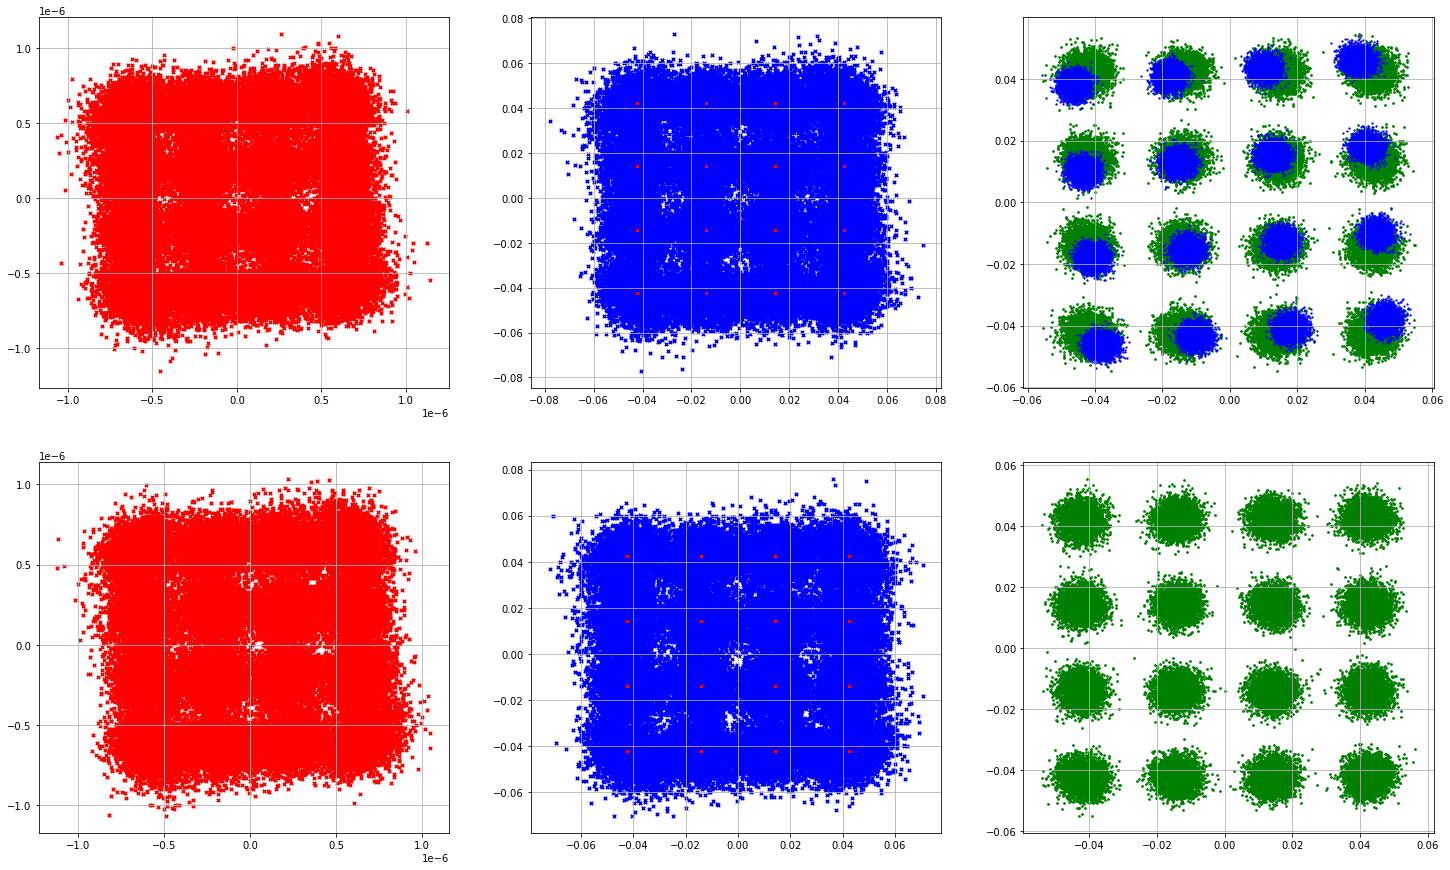

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Set font size for different elements
mpl.rcParams['font.size'] = 24
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['axes.titlesize'] = 24

n_symbols = [2**i for i in range(10, 17)]
n_spans = [entry["n_spans"] for entry in two_to_the_sixteen_symbols]

colors = ['xkcd:indigo', 'xkcd:kelly green', 'xkcd:sky blue', 'xkcd:cerulean', 'xkcd:light violet']

linewidth = 4

# Plot data for 12 spans
fig, axs = plt.subplots(1, 2, figsize=(30, 12))
# plt.plot(n_symbols, cpu_time_12spans, marker='o', label='CPU (12 spans)', linestyle='-', linewidth=2)
# plt.plot(n_symbols, gpu_time_12spans, marker='s', label='GPU (12 spans)', linestyle='-', linewidth=2)

# Plot data for varying spans with 2 ** 16 symbols
# plt.plot(n_spans, cpu_time, marker='x', label='CPU (2**16 symbols)', linestyle='--', linewidth=2)
# plt.plot(n_spans, gpu_time, marker='d', label='GPU (2**16 symbols)', linestyle='--', linewidth=2)


def connectpoints_vert(axe,x1,y1,y2,y_scale,x_shift=0,x_scale=1):
    axe.plot([x1,x1],[y1,y2],
             linestyle='--',
             color=colors[2],
             linewidth=linewidth/2)
    axe.text(x1*x_scale+x_shift, y1*y_scale, "x{:.1f}".format(y1/y2),
             fontsize=22,
             rotation=90)


# Plot data for varying spans with 2 ** 16 symbols and error bars
axs[0].errorbar(n_spans, cpu_time, yerr=cpu_variance,
                marker='o',
                color=colors[0],
                markersize=10,
                label=r'CPU ($2^{16}$ symbols)',
                linestyle='-', linewidth=linewidth)
axs[0].errorbar(n_spans, gpu_time, yerr=gpu_variance,
                marker='d',
                color=colors[1],
                markersize=10,
                label=r'GPU ($2^{16}$ symbols)',
                linestyle='-', linewidth=linewidth)

for k in [0, 3, 5, 7]:
    connectpoints_vert(axs[0],n_spans[k],cpu_time[k],gpu_time[k],y_scale=1/4,x_shift=0.2)
# connectpoints(axs[0],x,y,2,3)



axs[1].errorbar(n_symbols, cpu_time2, yerr=cpu_variance2,
                marker='o',
                color=colors[0],
                markersize=10,
                label='CPU (12 spans)',
                linestyle='-', linewidth=linewidth)
axs[1].errorbar(n_symbols, gpu_time2, yerr=gpu_variance2,
                marker='d',
                color=colors[1],
                markersize=10,
                label='GPU (12 spans)',
                linestyle='-', linewidth=linewidth)

for k in [0, 2, 4, 6]:
    connectpoints_vert(axs[1],n_symbols[k],cpu_time2[k],gpu_time2[k],y_scale=1/2,x_scale=1.05)



# axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Number of Spans')
axs[0].set_ylabel('Execution Time (s)')
# axs[0].title('Performance Comparison: CPU vs GPU')
axs[0].legend()
axs[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.5)


axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Number of Symbols')
axs[1].set_ylabel('Execution Time (s)')
# axs[1].title('Performance Comparison: CPU vs GPU')
axs[1].legend()
axs[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# axs[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.1f'))

from matplotlib.ticker import FuncFormatter
# Function to format x-ticks as 2 in power something
def format_ticks(x, pos):
    return f'$2^{{{int(np.log2(x))}}}$'

axs[1].xaxis.set_major_formatter(FuncFormatter(format_ticks))
axs[1].xaxis.set_ticks(n_symbols)


axs[0].text(n_spans[0]+0.5, cpu_time[0], "{:.1f} s".format(cpu_time[0]), fontsize=22)
axs[0].text(n_spans[-1]-1.5, cpu_time[-1], "{:.1f} s".format(cpu_time[-1]), fontsize=22)
axs[0].text(n_spans[0]+0.5, gpu_time[0]*0.9, "{:.1f} s".format(gpu_time[0]), fontsize=22)
axs[0].text(n_spans[-1]-1., gpu_time[-1], "{:.1f} s".format(gpu_time[-1]), fontsize=22)

axs[1].text(n_symbols[0]*0.9, cpu_time2[0]*1.2, "{:.1f} s".format(cpu_time2[0]), fontsize=22)
axs[1].text(n_symbols[-1]*0.6, cpu_time2[-1], "{:.1f} s".format(cpu_time2[-1]), fontsize=22)
axs[1].text(n_symbols[0], gpu_time2[0]*0.8, "{:.1f} s".format(gpu_time2[0]), fontsize=22)
axs[1].text(n_symbols[-1]*0.7, gpu_time2[-1], "{:.1f} s".format(gpu_time2[-1]), fontsize=22)


plt.show()

fig.savefig('total.pdf', bbox_inches='tight')

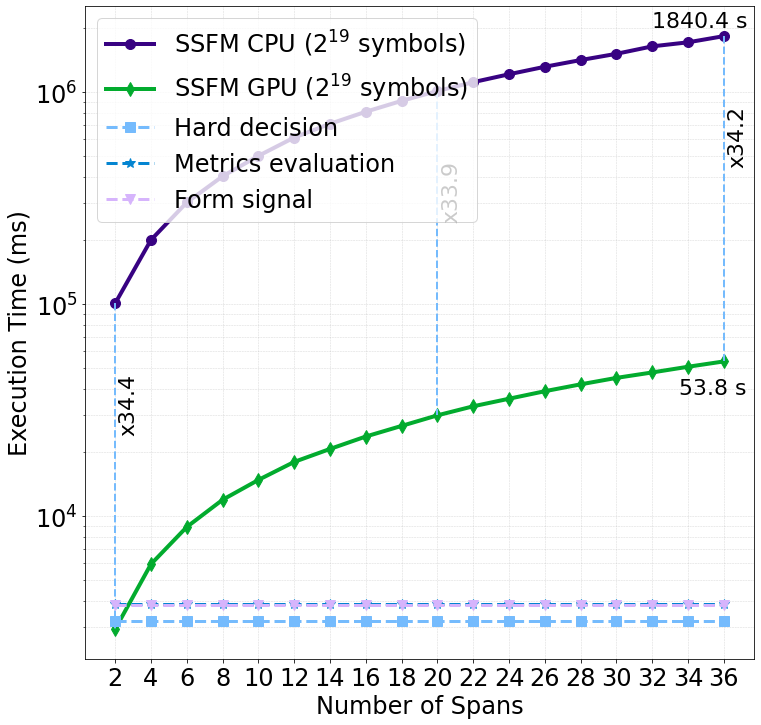

In [223]:
points_search_time = 3215.376
metrics_time = 3845.285
tx_time = (68448.994 - points_search_time - metrics_time - 53761.513) / 2
tx_time2 = (17199.977 - 3869.9249999999997 - 3097.47 - 2934.9970000000003) / 2

colors = ['xkcd:indigo', 'xkcd:kelly green', 'xkcd:sky blue', 'xkcd:cerulean', 'xkcd:light violet']

fig, axs = plt.subplots(1, 1, figsize=(12, 12))

linewidth = 4

axs.plot(n_spans_2_19, prop_cpu_2_19,
                marker='o',
                color=colors[0],
                markersize=10,
                label=r'SSFM CPU ($2^{19}$ symbols)',
                linestyle='-', linewidth=linewidth)
axs.plot(n_spans_2_19, prop_gpu_2_19,
                marker='d',
                color=colors[1],
                markersize=10,
                label=r'SSFM GPU ($2^{19}$ symbols)',
                linestyle='-', linewidth=linewidth)

for k in [0, 9, -1]:
    connectpoints_vert(axs,n_spans_2_19[k],prop_cpu_2_19[k],prop_gpu_2_19[k],y_scale=1/4,x_shift=0.2)

linewidth = 3
axs.plot(n_spans_2_19, points_search_time * np.ones(len(n_spans_2_19)),
                marker='s',
                color=colors[2],
                markersize=10,
                label=r'Hard decision',
                linestyle='--', linewidth=linewidth)

axs.plot(n_spans_2_19, metrics_time * np.ones(len(n_spans_2_19)),
                marker='*',
                color=colors[3],
                markersize=10,
                label=r'Metrics evaluation',
                linestyle='--', linewidth=linewidth)

axs.plot(n_spans_2_19, tx_time * np.ones(len(n_spans_2_19)),
                marker='v',
                color=colors[4],
                markersize=10,
                label=r'Form signal',
                linestyle='--', linewidth=linewidth)

axs.set_yscale('log')
axs.set_xlabel('Number of Spans')
axs.set_ylabel('Execution Time (ms)')
axs.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.5)
axs.legend(loc='upper left')
axs.xaxis.set_ticks(n_spans_2_19)

# axs[0].text(n_spans_2_19[0]+0.5, cpu_time[0], "{:.1f} s".format(cpu_time[0]), fontsize=22)
axs.text(n_spans_2_19[-1]-4, prop_cpu_2_19[-1]*1.1, "{:.1f} s".format(prop_cpu_2_19[-1] / 1000), fontsize=22)
# axs[0].text(n_spans_2_19[0]+0.5, gpu_time[0]*0.9, "{:.1f} s".format(gpu_time[0]), fontsize=22)
axs.text(n_spans_2_19[-1]-2.5, prop_gpu_2_19[-1]*0.7, "{:.1f} s".format(prop_gpu_2_19[-1] / 1000), fontsize=22)

plt.show()

fig.savefig('propagation.pdf', bbox_inches='tight')

In [5]:
points_x = result['points_x']
points_x_orig = result['points_x_orig']
points_x_shifted = result['points_x_shifted']
points_y = result['points_y']
points_y_orig = result['points_y_orig']
points_y_shifted = result['points_y_shifted']

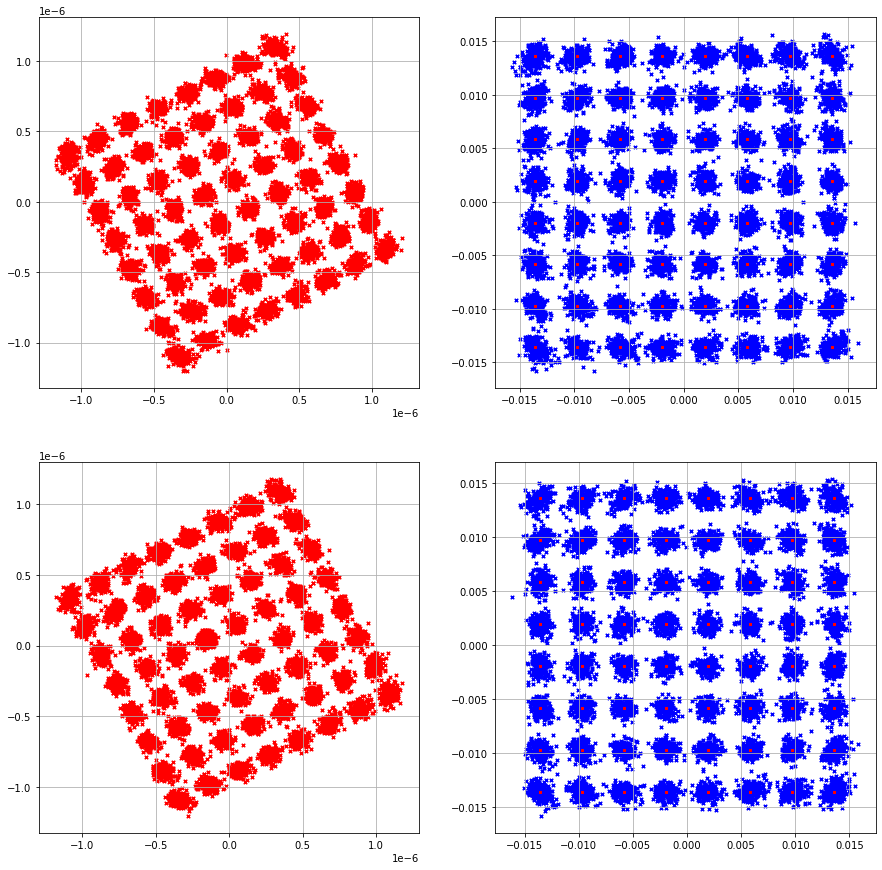

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(points_x.real, points_x.imag, s=12, c='r', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter(points_x_shifted.real, points_x_shifted.imag, s=12, c='b', marker='x')
axs[0][1].scatter(points_x_orig.real, points_x_orig.imag, s=6, c='r', marker='.')
axs[0][1].grid(True)

axs[1][0].scatter(points_y.real, points_y.imag, s=12, c='r', marker='x')
axs[1][0].grid(True)

axs[1][1].scatter(points_y_shifted.real, points_y_shifted.imag, s=12, c='b', marker='x')
axs[1][1].scatter(points_y_orig.real, points_y_orig.imag, s=6, c='r', marker='.')
axs[1][1].grid(True)

In [7]:
result_wdm = full_line_model_wdm(channel, wdm, channels_type='middle', verbose=2)

propagation took 747.2710000000001 ms
search x and y points took 86.91799999999999 ms
ber for x and y took 100.98400000000001 ms
BER (x / y): (0.000457763671875, 45) (0.0005086263020833334, 50)
Q^2-factor (x / y): 3.3152758417429067 3.28571116924923


In [8]:
points_wdm_x = result_wdm['points_x']
points_wdm_x_orig = result_wdm['points_x_orig'][0]
points_wdm_x_shifted = result_wdm['points_x_shifted']
points_wdm_y = result_wdm['points_y']
points_wdm_y_orig = result_wdm['points_y_orig'][0]
points_wdm_y_shifted = result_wdm['points_y_shifted']

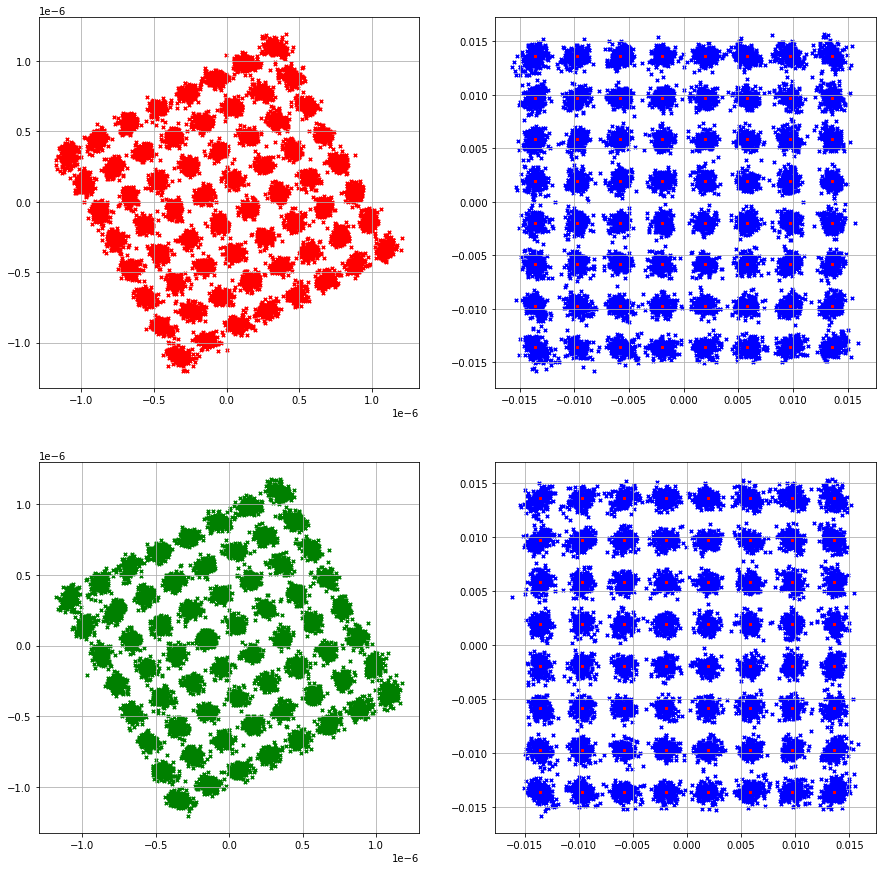

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(points_wdm_x.real, points_wdm_x.imag, s=12, c='r', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter(points_wdm_x_shifted.real, points_wdm_x_shifted.imag, s=12, c='b', marker='x')
axs[0][1].scatter(points_wdm_x_orig.real, points_wdm_x_orig.imag, s=6, c='r', marker='.')
axs[0][1].grid(True)

axs[1][0].scatter(points_wdm_y.real, points_wdm_y.imag, s=12, c='green', marker='x')
axs[1][0].grid(True)

axs[1][1].scatter(points_wdm_y_shifted.real, points_wdm_y_shifted.imag, s=12, c='b', marker='x')
axs[1][1].scatter(points_wdm_y_orig.real, points_wdm_y_orig.imag, s=6, c='r', marker='.')
axs[1][1].grid(True)

In [55]:
nonlinear_shift(points_x, points_x_orig)

(15521.753935558-6569.466242305321j)

## Backward

In [86]:
result_back = full_line_model_back_to_back(channel, wdm, verbose=3)

Average signal power (x / y): 0.0001588 / 0.0001562 (has to be close to 0.0001581)
forward propagation took 759.929 ms
Signal energy before propagation (x / y): 2.005857092998403e-05 1.9734644847332935e-05
Signal energy after propagation (x / y): 2.0058570929985912e-05 1.9734644847334782e-05
Signal energy difference (x / y): 1.8804131429045468e-18 1.8465318250143747e-18
backward propagation took 730.2180000000001 ms
Signal energy before propagation (x / y): 2.005857092998403e-05 1.9734644847332935e-05
Signal energy after propagation (x / y): 2.0058570929985912e-05 1.9734644847334782e-05
Signal energy after backward propagation (x / y): 2.0058570929988108e-05 1.973464484733693e-05
Signal energy difference (x / y): 1.8804131429045468e-18 1.8465318250143747e-18 4.075922542187693e-18 3.9946073792512804e-18
search x and y points took 71.078 ms
ber for x and y took 92.94 ms
BER (x / y): (0.0, 0) (0.0, 0)
Q^2-factor (x / y): inf inf


In [87]:
points_back_x = result_back['points_x']
points_back_x_orig = result_back['points_x_orig']
points_back_x_shifted = result_back['points_x_shifted']
points_back_y = result_back['points_y']
points_back_y_orig = result_back['points_y_orig']
points_back_y_shifted = result_back['points_y_shifted']

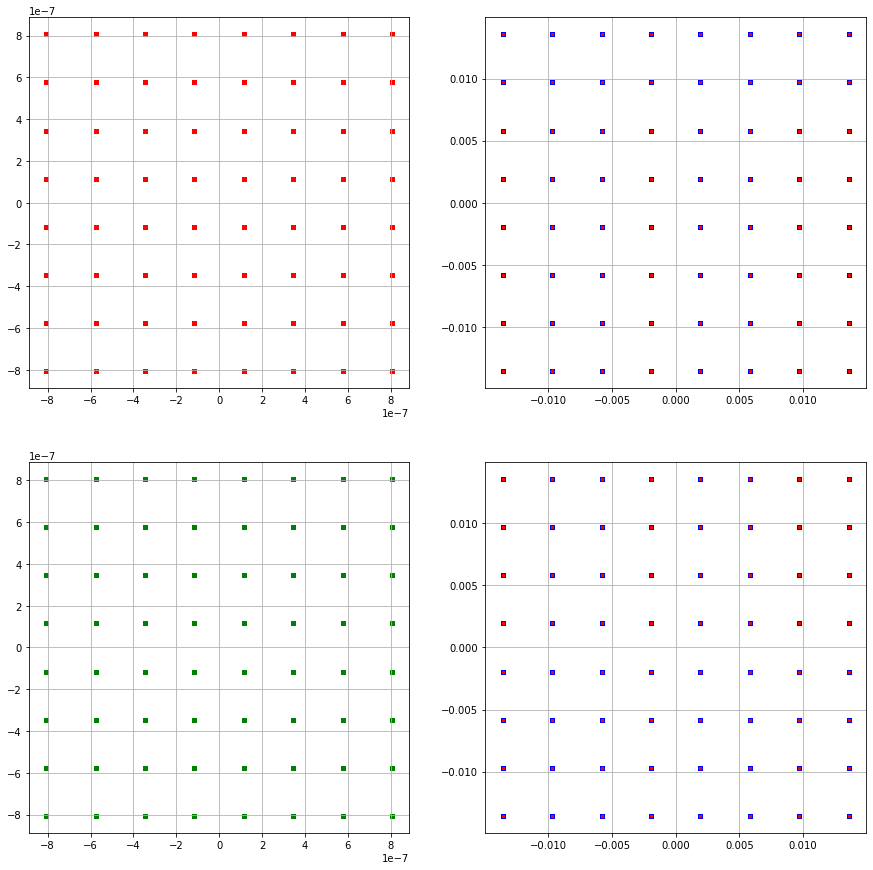

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(points_back_x.real, points_back_x.imag, s=12, c='r', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter(points_back_x_shifted.real, points_back_x_shifted.imag, s=12, c='b', marker='x')
axs[0][1].scatter(points_back_x_orig.real, points_back_x_orig.imag, s=6, c='r', marker='.')
axs[0][1].grid(True)

axs[1][0].scatter(points_back_y.real, points_back_y.imag, s=12, c='green', marker='x')
axs[1][0].grid(True)

axs[1][1].scatter(points_back_y_shifted.real, points_back_y_shifted.imag, s=12, c='b', marker='x')
axs[1][1].scatter(points_back_y_orig.real, points_back_y_orig.imag, s=6, c='r', marker='.')
axs[1][1].grid(True)

### Handmode

In [12]:
from ssfm_gpu.propagation import propagate_manakov, propagate_manakov_backward

import numpy as np

In [14]:
channel = create_channel_parameters(n_spans=12,
                                     z_span=80,
                                     alpha_db=0.2,
                                     gamma=1.2,
                                     noise_figure_db=-200,
                                     dispersion_parameter=16.8,
                                     dz=1)

wdm = create_wdm_parameters(n_channels=1, p_ave_dbm=0, n_symbols=2 ** 14, m_order=16, roll_off=0.1, upsampling=16,
                            downsampling_rate=1, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2)

channel_back = channel.copy()
channel_back['z_span'] = -channel['z_span']
channel_back['alpha_db'] = -channel['alpha_db']
channel_back['alpha'] = -channel['alpha']

channel_backward = channel.copy()
channel_backward['z_span'] = -channel['z_span']


In [15]:
signal_x_init, signal_y_init, wdm_info = generate_wdm(wdm)

dt = 1. / wdm['sample_freq']
t = dt * np.arange(len(signal_x_init))

# generate_wdm is for multichannel wdm
# for only one channel we have to take [0] element in list
# that will correspond to desired values
points_x_orig = wdm_info['points_x'][0]
points_y_orig = wdm_info['points_y'][0]
ft_filter_values = wdm_info['ft_filter_values_x'][0]

signal_x_prop, signal_y_prop = propagate_manakov(channel, signal_x_init, signal_y_init, wdm['sample_freq'])
signal_x_prop2, signal_y_prop2 = propagate_manakov(channel, signal_x_prop, signal_y_prop, wdm['sample_freq'])
signal_x, signal_y = propagate_manakov(channel_back, signal_x_prop, signal_y_prop, wdm['sample_freq'])
signal_x_back, signal_y_back = propagate_manakov_backward(channel_backward, signal_x_prop, signal_y_prop, wdm['sample_freq'])


In [16]:
print(np.mean(np.absolute(signal_x)),
      np.max(np.absolute(signal_x - signal_x_init)),
      np.mean(np.absolute(signal_x - signal_x_init)),
      np.max(np.absolute(signal_x - signal_x_init)) / np.mean(np.absolute(signal_x)))

print(np.mean(np.absolute(signal_x_back)),
      np.max(np.absolute(signal_x_back - signal_x_init)),
      np.mean(np.absolute(signal_x_back - signal_x_init)),
      np.max(np.absolute(signal_x_back - signal_x_init)) / np.mean(np.absolute(signal_x_back)))

0.020697901392807017 0.0028838181098695343 0.0007164057831686216 0.13932900998705722
0.02069669969761329 2.9250312473621146e-12 7.144523229600192e-13 1.4132839003792593e-10


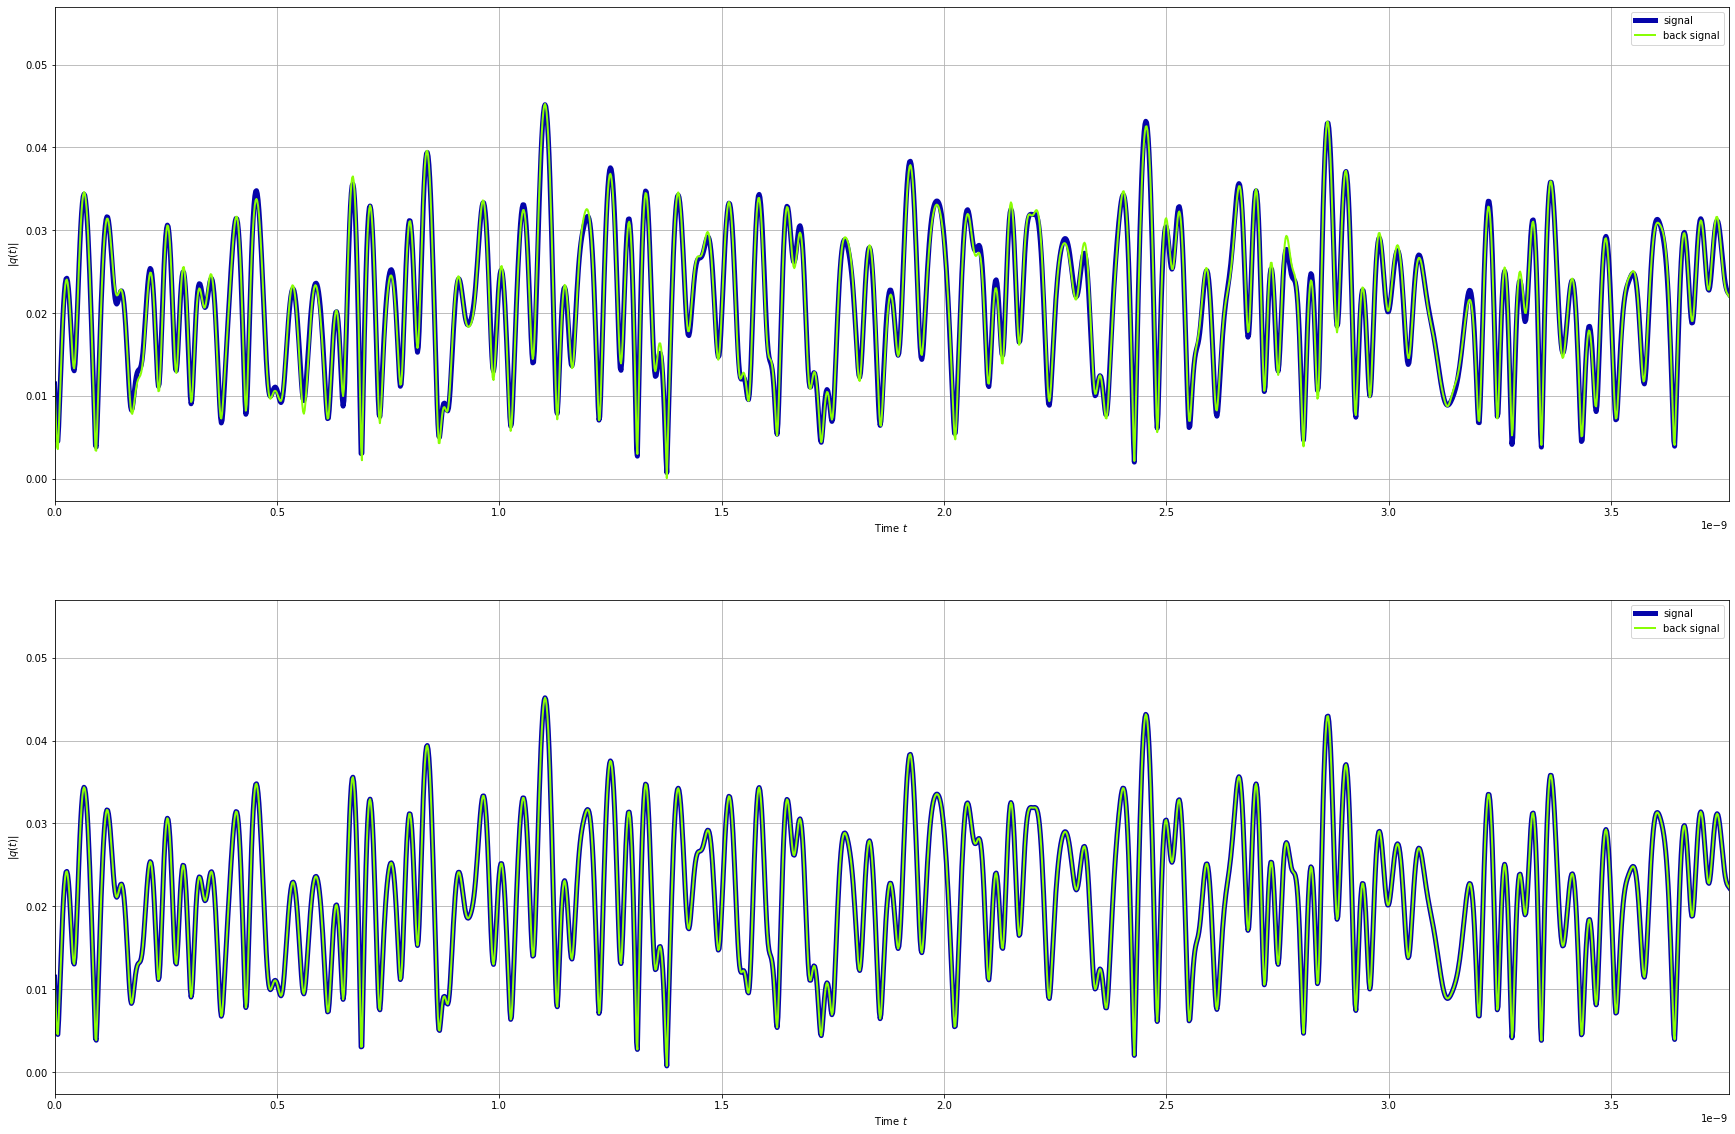

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(30,20))
axs[0].plot(t, np.absolute(signal_x_init),
               color='xkcd:royal blue', linewidth=5,
               label='signal')
axs[0].plot(t, np.absolute(signal_x),
               color='xkcd:lime green', linewidth=2,
               label='back signal')
axs[0].set_xlabel('Time $t$')
axs[0].set_xlim(t[0], t[2048])
# axs[0][0].set_xlim(-t_plot_full_lim, t_plot_full_lim)
axs[0].set_ylabel(r'$|q(t)|$')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(t, np.absolute(signal_x_init),
               color='xkcd:royal blue', linewidth=5,
               label='signal')
axs[1].plot(t, np.absolute(signal_x_back),
               color='xkcd:lime green', linewidth=2,
               label='back signal')
axs[1].set_xlabel('Time $t$')
axs[1].set_xlim(t[0], t[2048])
# axs[0][0].set_xlim(-t_plot_full_lim, t_plot_full_lim)
axs[1].set_ylabel(r'$|q(t)|$')
axs[1].legend()
axs[1].grid(True)

In [37]:
# Helper function to xor two characters
def xor_c(a, b):
    return int(0) if (a == b) else int(1)

# function to convert binary string
# to gray string
def binarytoGray(binary, num_bits_symbol):
    gray = np.zeros((len(binary),), dtype=int)
    # MSB of gray code is same as
    # binary code
    NN = int(len(binary) / num_bits_symbol)
    count = 0
    for ij in range(0, NN):
        gray[count] = binary[count]
        for j in range(count + 1, count + num_bits_symbol):
            gray[j] = xor_c(binary[j - 1], binary[j])
        count = count + num_bits_symbol
    return gray

num_bits_symbol = 4
n_bits = int(num_bits_symbol * wdm['n_symbols'])

bits_x = np.random.randint(0, 2, n_bits, int)  # random bit stream
gray_x = binarytoGray(bits_x, num_bits_symbol)
bits_y = np.random.randint(0, 2, n_bits, int)  # random bit stream
gray_y = binarytoGray(bits_y, num_bits_symbol)

bits_x_temp = ''.join(str(k) for k in gray_x)  # in current realisation bits are string
bits_y_temp = ''.join(str(k) for k in gray_y)


In [87]:
wdm = create_wdm_parameters(n_channels=1, p_ave_dbm=0, n_symbols=2 ** 16, m_order=16, roll_off=0.1, upsampling=16,
                            downsampling_rate=1, symb_freq=34e9, channel_spacing=0, n_polarisations=2)

# SSFM fiber
channel = create_channel_parameters(n_spans=5,
                                    z_span=100,
                                    alpha_db=0.2,
                                    gamma=1.2,
                                    noise_figure_db=4.5,
                                    dispersion_parameter=16.8,
                                    dz=1)

# TWC fiber
# channel = create_channel_parameters(n_spans=9,
#                                     z_span=50,
#                                     alpha_db=0.23,
#                                     gamma=2.5,
#                                     noise_figure_db=4.5,
#                                     dispersion_parameter=2.8,
#                                     dz=1)

In [69]:
print(channel)

{'n_spans': 12, 'z_span': 80, 'alpha_db': 0.2, 'alpha': 0.04605170185988092, 'gamma': 1.2, 'noise_figure_db': 4.5, 'noise_figure': 2.8183829312644537, 'gain': 39.810717055349734, 'dispersion_parameter': 16.8, 'beta2': -2.1412706043583603e-23, 'beta3': 0, 'h_planck': 6.6256e-34, 'fc': 6.6256e-34, 'dz': 1, 'nz': 80, 'noise_density': 1.4017348942214644e-17, 'seed': 'fixed'}


In [92]:
result = full_line_model(channel, wdm, bits=([bits_x_temp], [bits_y_temp]), verbose=2)

propagation took 3391.414 ms
search x and y points took 44.905 ms
ber for x and y took 108.57700000000001 ms
BER (x / y): (4.57763671875e-05, 12) (3.814697265625e-05, 10)
Q^2-factor (x / y): 3.9119529938830695 3.9557530379304953


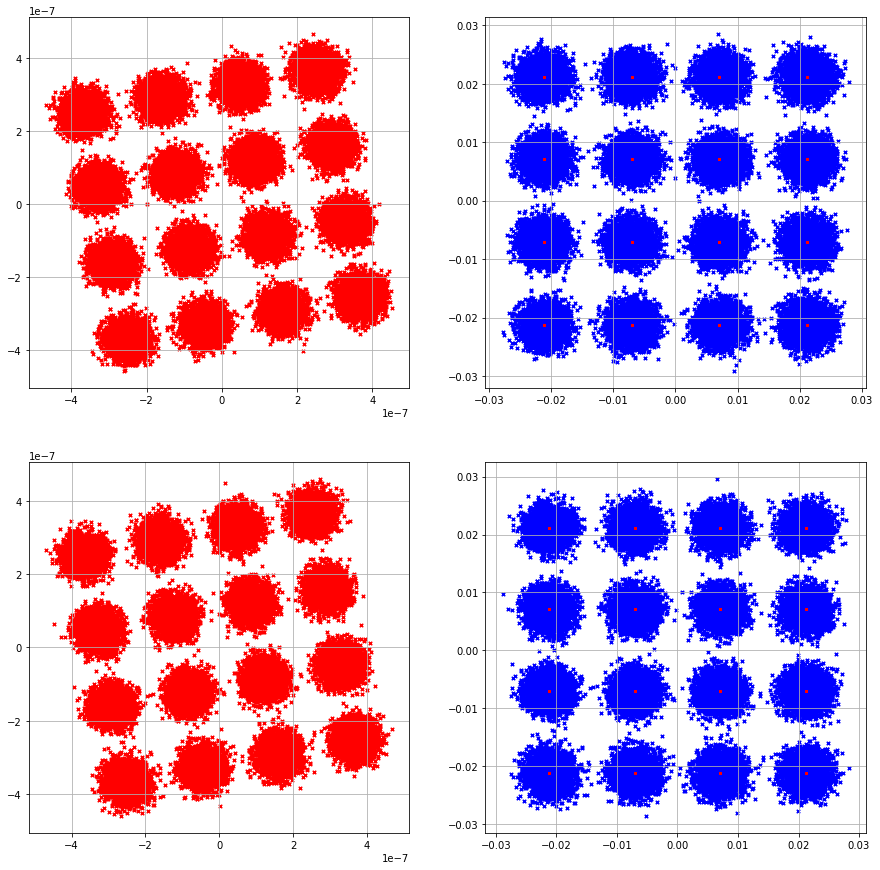

In [93]:
points_x = result['points_x']
points_x_orig = result['points_x_orig']
points_x_shifted = result['points_x_shifted']
points_y = result['points_y']
points_y_orig = result['points_y_orig']
points_y_shifted = result['points_y_shifted']

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(points_x.real, points_x.imag, s=12, c='r', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter(points_x_shifted.real, points_x_shifted.imag, s=12, c='b', marker='x')
axs[0][1].scatter(points_x_orig.real, points_x_orig.imag, s=6, c='r', marker='.')
axs[0][1].grid(True)

axs[1][0].scatter(points_y.real, points_y.imag, s=12, c='r', marker='x')
axs[1][0].grid(True)

axs[1][1].scatter(points_y_shifted.real, points_y_shifted.imag, s=12, c='b', marker='x')
axs[1][1].scatter(points_y_orig.real, points_y_orig.imag, s=6, c='r', marker='.')
axs[1][1].grid(True)

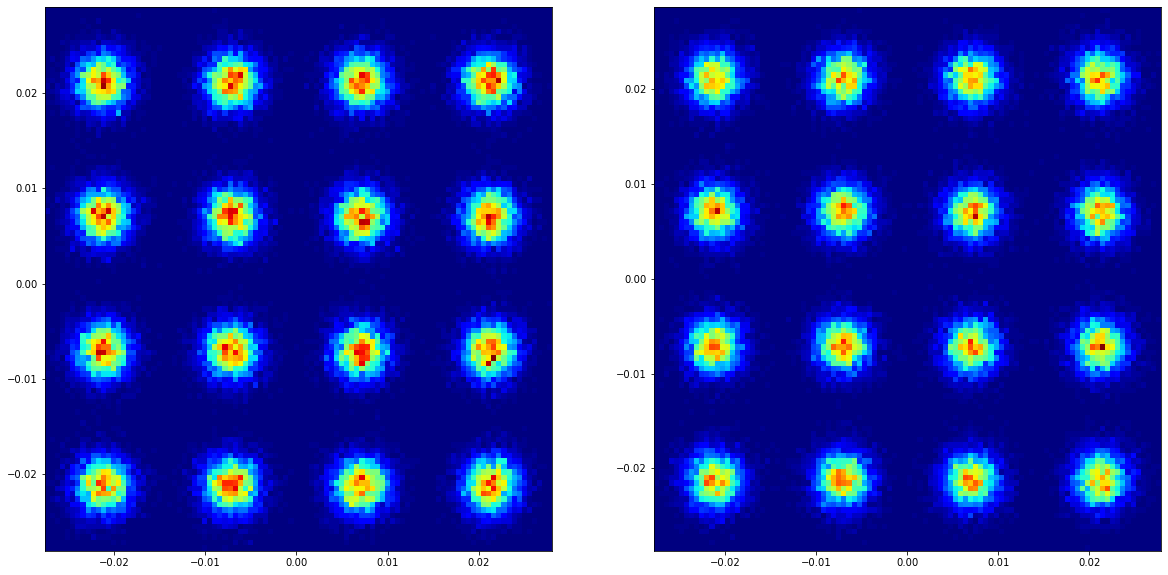

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].hist2d(result['points_x_shifted'].real, result['points_x_shifted'].imag, bins=(100, 100), cmap=plt.cm.jet)
axs[1].hist2d(result['points_y_shifted'].real, result['points_y_shifted'].imag, bins=(100, 100), cmap=plt.cm.jet)
plt.show()

In [81]:
x = result['points_x_shifted'].real
y = result['points_x_shifted'].imag

hist = go.Histogram2d(x=x, y=y, nbinsx=200, nbinsy=200)
data = [hist]

layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000)

fig = go.Figure(data=data, layout=layout)

fig.show()

# Test WDM model

In [167]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import hpcom
from datetime import datetime

from hpcom.signal import create_wdm_parameters, generate_wdm, generate_wdm_optimise, receiver, receiver_wdm,\
    nonlinear_shift, dbm_to_mw, get_default_wdm_parameters
from hpcom.modulation import get_modulation_type_from_order, get_scale_coef_constellation, \
    get_nearest_constellation_points_unscaled
from hpcom.metrics import get_ber_by_points, get_ber_by_points_ultimate, get_energy, get_average_power, get_evm_ultimate, get_evm
from hpcom.channel import create_channel_parameters, full_line_model, full_line_model_wdm

from ssfm_gpu.propagation import propagate_manakov, propagate_manakov_backward, \
    propagate_schrodinger, dispersion_compensation_manakov

In [186]:
# create parameters
wdm = create_wdm_parameters(n_channels=5, p_ave_dbm=3, n_symbols=2 ** 15, m_order=64, roll_off=0.1, upsampling=16,
                            downsampling_rate=1, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2)


channel = create_channel_parameters(n_spans=12,
                                    z_span=80,
                                    alpha_db=0.0,
                                    gamma=0.01,  # 1.2
                                    noise_figure_db=-200,
                                    dispersion_parameter=16.8,
                                    dz=5)

In [14]:
# other parameters
bits=None
points=None
channels_type='all'
verbose=3
dbp=False

In [187]:
dt = 1. / wdm['sample_freq']

signal_x, signal_y, wdm_info = generate_wdm(wdm, bits=bits, points=points)

points_x_orig = wdm_info['points_x']
points_y_orig = wdm_info['points_y']

ft_filter_values = wdm_info['ft_filter_values_x']
np_signal = len(signal_x)

e_signal_x = get_energy(signal_x, dt * np_signal)
e_signal_y = get_energy(signal_y, dt * np_signal)
p_signal_x = get_average_power(signal_x, dt)
p_signal_y = get_average_power(signal_y, dt)
p_signal_correct = dbm_to_mw(wdm['p_ave_dbm']) / 1000 / wdm['n_polarisations'] * wdm['n_channels']
print("Average signal power (x / y): "
      "%1.7f / %1.7f (has to be close to %1.7f)" % (p_signal_x, p_signal_y, p_signal_correct)) if verbose >= 3 else ...

start_time = datetime.now()
if not dbp:
    signal_x, signal_y = propagate_manakov(channel, signal_x, signal_y, wdm['sample_freq'])
else:
    print('DBP')
    channel_back = channel.copy()
    channel_back['z_span'] = -channel['z_span']

    # [propagate_manakov_backward] is the proper function for backpropagation
    # which properly handle attenuation of the signal
    # if you still wand to use [propagate_manakov] then you have to set alpha = -alpha for channel parameters
    signal_x, signal_y = propagate_manakov_backward(channel_back, signal_x, signal_y, wdm['sample_freq'])
print("propagation took", (datetime.now() - start_time).total_seconds() * 1000, "ms") if verbose >= 2 else ...

e_signal_x_prop = get_energy(signal_x, dt * np_signal)
e_signal_y_prop = get_energy(signal_y, dt * np_signal)

if verbose >= 3:
    print("Signal energy before propagation (x / y):", e_signal_x, e_signal_y)
    print("Signal energy after propagation (x / y):", e_signal_x_prop, e_signal_y_prop)
    print("Signal energy difference (x / y):",
          np.absolute(e_signal_x - e_signal_x_prop),
          np.absolute(e_signal_y - e_signal_y_prop))

if not dbp:
    signal_x, signal_y = dispersion_compensation_manakov(channel, signal_x, signal_y, 1. / wdm['sample_freq'])

samples_x = receiver_wdm(signal_x, ft_filter_values, wdm)
samples_y = receiver_wdm(signal_y, ft_filter_values, wdm)

# TODO: make CDC after receiver
# for k in range(wdm['n_channels']):
#     samples_x[k], samples_y[k] = dispersion_compensation(channel, samples_x[k], samples_y[k], wdm['downsampling_rate'] / wdm['sample_freq'])

# print(np.shape(samples_x))

sample_step = int(wdm['upsampling'] / wdm['downsampling_rate'])

if channels_type == 'all':

    points_x = []
    points_y = []

    points_x_shifted = []
    points_y_shifted = []

    for k in range(wdm['n_channels']):
        samples_x_temp = samples_x[k]
        samples_y_temp = samples_y[k]
        # print(np.shape(samples_x_temp[::sample_step]))
        points_x.append(samples_x_temp[::sample_step].numpy())
        points_y.append(samples_y_temp[::sample_step].numpy())

        nl_shift_x = nonlinear_shift(points_x[k], points_x_orig[k])
        points_x_shifted.append(points_x[k] * nl_shift_x)

        nl_shift_y = nonlinear_shift(points_y[k], points_y_orig[k])
        points_y_shifted.append(points_y[k] * nl_shift_y)

    mod_type = get_modulation_type_from_order(wdm['m_order'])
    scale_constellation = get_scale_coef_constellation(mod_type) / np.sqrt(wdm['p_ave'] / wdm['n_polarisations'])

    points_x_found = []
    points_y_found = []

    ber_x = []
    ber_y = []
    q_x = []
    q_y = []
    for k in range(wdm['n_channels']):
        print('WDM channel', k) if verbose >= 1 else ...

        start_time = datetime.now()
        points_x_found.append(get_nearest_constellation_points_unscaled(points_x_shifted[k], mod_type))
        points_y_found.append(get_nearest_constellation_points_unscaled(points_y_shifted[k], mod_type))
        print("search x and y points took",
              (datetime.now() - start_time).total_seconds() * 1000, "ms") if verbose >= 2 else ...

        start_time = datetime.now()
        ber_x.append(get_ber_by_points(points_x_orig[k] * scale_constellation, points_x_found[k], mod_type))
        ber_y.append(get_ber_by_points(points_y_orig[k] * scale_constellation, points_y_found[k], mod_type))
        print("ber for x and y took",
              (datetime.now() - start_time).total_seconds() * 1000, "ms") if verbose >= 2 else ...

        q_x.append(np.sqrt(2) * sp.special.erfcinv(2 * ber_x[k][0]))
        q_y.append(np.sqrt(2) * sp.special.erfcinv(2 * ber_y[k][0]))

        print("BER (x / y):", ber_x[k], ber_y[k]) if verbose >= 1 else ...
        print(r'Q^2-factor (x / y):', q_x[k], q_y[k]) if verbose >= 1 else ...

elif channels_type == 'middle':

    k = (wdm['n_channels'] - 1) // 2

    samples_x_temp = samples_x[k]
    samples_y_temp = samples_y[k]

    points_x = samples_x_temp[::sample_step].numpy()
    points_y = samples_y_temp[::sample_step].numpy()

    nl_shift_x = nonlinear_shift(points_x, points_x_orig[k])
    points_x_shifted = points_x * nl_shift_x

    nl_shift_y = nonlinear_shift(points_y, points_y_orig[k])
    points_y_shifted = points_y * nl_shift_y

    mod_type = get_modulation_type_from_order(wdm['m_order'])
    scale_constellation = get_scale_coef_constellation(mod_type) / np.sqrt(wdm['p_ave'] / wdm['n_polarisations'])

    start_time = datetime.now()
    points_x_found = get_nearest_constellation_points_unscaled(points_x_shifted, mod_type)
    points_y_found = get_nearest_constellation_points_unscaled(points_y_shifted, mod_type)
    print("search x and y points took",
          (datetime.now() - start_time).total_seconds() * 1000, "ms") if verbose >= 2 else ...

    start_time = datetime.now()
    ber_x = get_ber_by_points(points_x_orig[k] * scale_constellation, points_x_found, mod_type)
    ber_y = get_ber_by_points(points_y_orig[k] * scale_constellation, points_y_found, mod_type)
    print("ber for x and y took",
          (datetime.now() - start_time).total_seconds() * 1000, "ms") if verbose >= 2 else ...

    q_x = np.sqrt(2) * sp.special.erfcinv(2 * ber_x[0])
    q_y = np.sqrt(2) * sp.special.erfcinv(2 * ber_y[0])

    print("BER (x / y):", ber_x, ber_y) if verbose >= 1 else ...
    print(r'Q^2-factor (x / y):', q_x, q_y) if verbose >= 1 else ...

else:
    print('Error[full_line_model_wdm]: no such type of channels_type variable')


Average signal power (x / y): 0.0049803 / 0.0049915 (has to be close to 0.0049882)
propagation took 1368.22 ms
Signal energy before propagation (x / y): 0.002516521903920871 0.0025221712541014826
Signal energy after propagation (x / y): 0.002516521903918273 0.0025221712540989013
Signal energy difference (x / y): 2.598182086144263e-15 2.581268532253489e-15
WDM channel 0
search x and y points took 197.845 ms
ber for x and y took 222.765 ms
BER (x / y): (0.0, 0) (0.0, 0)
Q^2-factor (x / y): inf inf
WDM channel 1
search x and y points took 177.551 ms
ber for x and y took 224.918 ms
BER (x / y): (1.0172526041666666e-05, 2) (0.0, 0)
Q^2-factor (x / y): 4.261069968093373 inf
WDM channel 2
search x and y points took 179.332 ms
ber for x and y took 223.204 ms
BER (x / y): (1.0172526041666666e-05, 2) (0.0, 0)
Q^2-factor (x / y): 4.261069968093373 inf
WDM channel 3
search x and y points took 178.098 ms
ber for x and y took 222.14000000000001 ms
BER (x / y): (0.0, 0) (0.0, 0)
Q^2-factor (x / y): i

0.0315964862964314


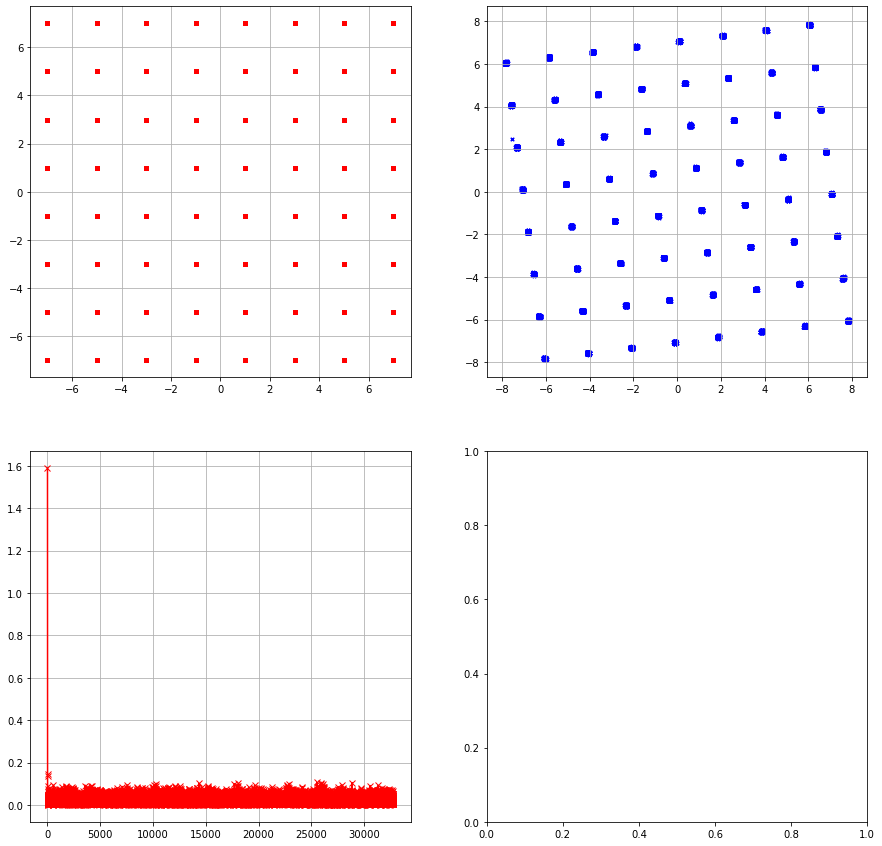

In [188]:
wdm_ind = 2

plot_scale = scale_constellation

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter((points_x_orig[wdm_ind] * plot_scale).real, (points_x_orig[wdm_ind] * plot_scale).imag, s=12, c='r', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter((points_x[wdm_ind] * plot_scale).real, (points_x[wdm_ind] * plot_scale).imag, s=12, c='b', marker='x')
axs[0][1].grid(True)

axs[1][0].plot(np.absolute(points_x_orig[wdm_ind] * scale_constellation - points_x_shifted[wdm_ind] * scale_constellation), c='r', marker='x')
axs[1][0].grid(True)

print(get_evm(points_x_orig[wdm_ind] * scale_constellation,
              points_x_shifted[wdm_ind] * scale_constellation))

In [189]:
np.max(np.absolute(points_x_orig[wdm_ind] - points_x_shifted[wdm_ind]) * scale_constellation)

1.5902144173213228

In [137]:
def cut_spectrum(spectrum, freq, bandwidth):
    if len(freq) != len(spectrum):
        print("[cut_spectrum] Error: spectrum and frequency arrays have different length")
        return -1

    spectrum_cut = np.copy(spectrum)
    ind = np.where(np.logical_or(freq < -bandwidth / 2, freq > bandwidth / 2))
    spectrum_cut[ind] = 0.0

    return spectrum_cut


def filter_shaper_spectral(spectrum, ft_filter_val):
    # if we alrady have spectrum of the signal we don't need to calculate it again
    # print('with ifftshift')
    return tf.signal.ifftshift(tf.signal.ifft(tf.signal.ifftshift(spectrum * ft_filter_val)))
    # print('no ifftshift')
    # return tf.signal.ifft(tf.signal.ifftshift(spectrum * filter_val))


def matched_filter_spectral(spectrum, filter_val):
    # return filter_shaper_spectral(spectrum, filter_val) / tf.cast(tf.reduce_sum(tf.math.pow(tf.math.abs(filter_val), 2)), tf.complex128)
    # return filter_shaper_spectral(spectrum, filter_val) / tf.cast(tf.reduce_sum(tf.math.abs(filter_val)), tf.complex128)
    return filter_shaper_spectral(spectrum, filter_val / tf.cast(tf.reduce_mean(tf.math.pow(tf.math.abs(filter_val), 2)), tf.complex128))


def matched_filter_wdm(signal, ft_filter_values, wdm):
    signals_decoded = []

    nt = len(signal)
    dt = 1. / wdm['sample_freq']
    t_span = dt * nt
    t = np.array([dt * (k - nt / 2) for k in range(nt)])
    f = np.array([(i - nt / 2) * (1. / t_span) for i in range(nt)])

    for k in range(wdm['n_channels']):
        # w_channel = -2. * np.pi * dw * (wdm_index - (wdm['n_channels'] - 1) // 2)

        w_channel = 2. * np.pi * wdm['channel_spacing'] * (k - (wdm['n_channels'] - 1) // 2)
        signal_shifted = signal * np.exp(1.0j * w_channel * t)
        spectrum = cut_spectrum(tf.signal.fftshift(tf.signal.fft(signal_shifted)), f, wdm['channel_spacing'])
        signals_decoded.append(matched_filter_spectral(spectrum, ft_filter_values[k]))

    return signals_decoded

def receiver_wdm(signal, ft_filter_values, wdm):
    # TODO: it is not working properly (check end to end)

    # start_time = datetime.now()
    # signals_decoded = []

    # nt = len(signal)
    # t_span = 1 / wdm['sample_freq'] * nt
    # f = np.array([(i - nt / 2) * (1. / t_span) for i in range(nt)])

    # for n_channel in range(-wdm['n_channels'] // 2 + 1, wdm['n_channels'] // 2 + 1):
    #     signal = matched_filter_wdm(signal, ft_filter_values, f, wdm['channel_spacing'], n_channel)
    #     signals_decoded.append(signal[::wdm['downsampling_rate']])  # downsample

    signals_decoded = matched_filter_wdm(signal, ft_filter_values, wdm)

    for k in range(wdm['n_channels']):
        signals_decoded[k] = signals_decoded[k][::wdm['downsampling_rate']]

    # end_time = datetime.now()
    # time_diff = (end_time - start_time)
    # execution_time = time_diff.total_seconds() * 1000
    # print("Matched filter took", execution_time, "ms")

    return signals_decoded


def get_points_wdm(samples, wdm):

    sample_step = int(wdm['upsampling'] / wdm['downsampling_rate'])
    points = samples[::sample_step].numpy()

    return points

In [142]:
# end-to-end test

wdm_ind = 0

signal_x, signal_y, wdm_info = generate_wdm(wdm, bits=bits, points=points)

points_x_orig = wdm_info['points_x']
points_y_orig = wdm_info['points_y']

samples_x = receiver_wdm(signal_x, ft_filter_values, wdm)
samples_y = receiver_wdm(signal_y, ft_filter_values, wdm)

sample_step = int(wdm['upsampling'] / wdm['downsampling_rate'])

points_x_recovered = get_points_wdm(samples_x[wdm_ind], wdm)

print(np.max(np.absolute(points_x_orig[wdm_ind] - points_x_recovered)))

0.0024146392326482567


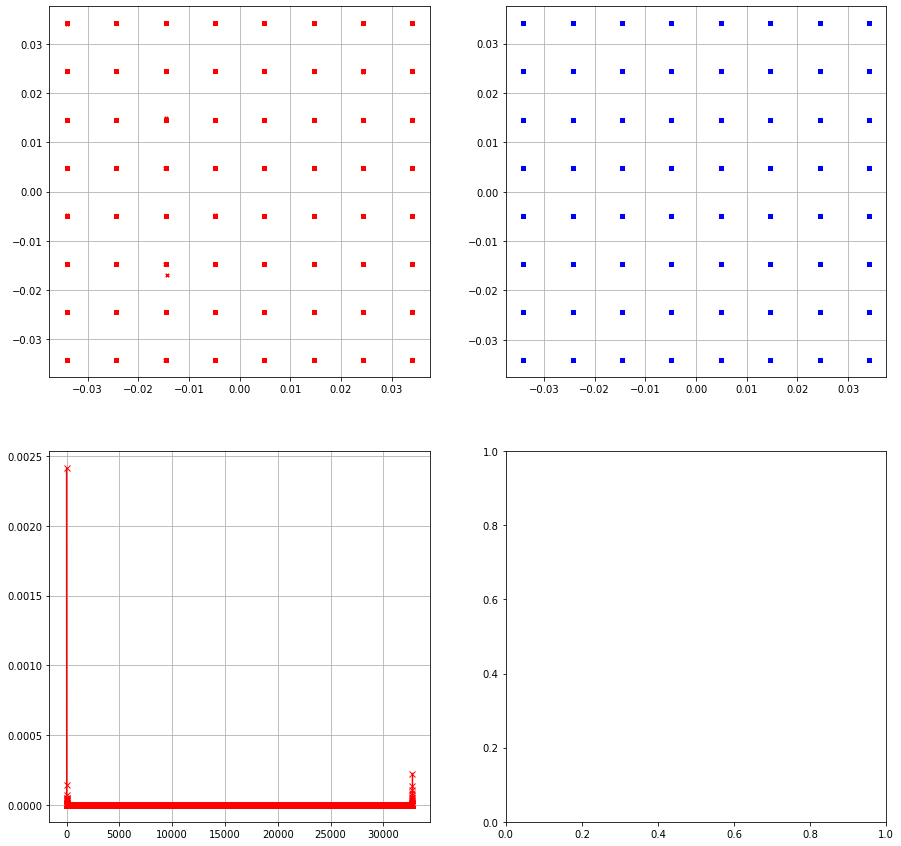

In [143]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(points_x_recovered.real, points_x_recovered.imag, s=12, c='r', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter(points_x_orig[wdm_ind].real, points_x_orig[wdm_ind].imag, s=12, c='b', marker='x')
axs[0][1].grid(True)

axs[1][0].plot(np.absolute(points_x_orig[wdm_ind] - points_x_recovered), c='r', marker='x')
axs[1][0].grid(True)

# axs[1][1].scatter(points_y_shifted.real, points_y_shifted.imag, s=12, c='b', marker='x')
# axs[1][1].scatter(points_y_orig.real, points_y_orig.imag, s=6, c='r', marker='.')
# axs[1][1].grid(True)

In [109]:
nt = len(signal_x)
dt = 1. / wdm['sample_freq']
t_span = dt * nt
t = np.arange(-nt / 2, nt / 2) * dt
f = np.arange(-nt / 2, nt / 2) * (1. / t_span)

k = 2

w_channel = 2. * np.pi * wdm['channel_spacing'] * (k - (wdm['n_channels'] - 1) // 2)
spectrum_orig = tf.signal.fftshift(tf.signal.fft(signal_x))
signal_shifted = signal_x * np.exp(1.0j * w_channel * t)
spectrum_init = tf.signal.fftshift(tf.signal.fft(signal_shifted))
spectrum = cut_spectrum(spectrum_init, f, wdm['channel_spacing'])

signal_from_spectrum = tf.signal.ifft(tf.signal.ifftshift(spectrum))
signal_from_spectrum = signal_from_spectrum * np.exp(-1.0j * w_channel * t)
spec_back = tf.signal.fftshift(tf.signal.fft(signal_from_spectrum))

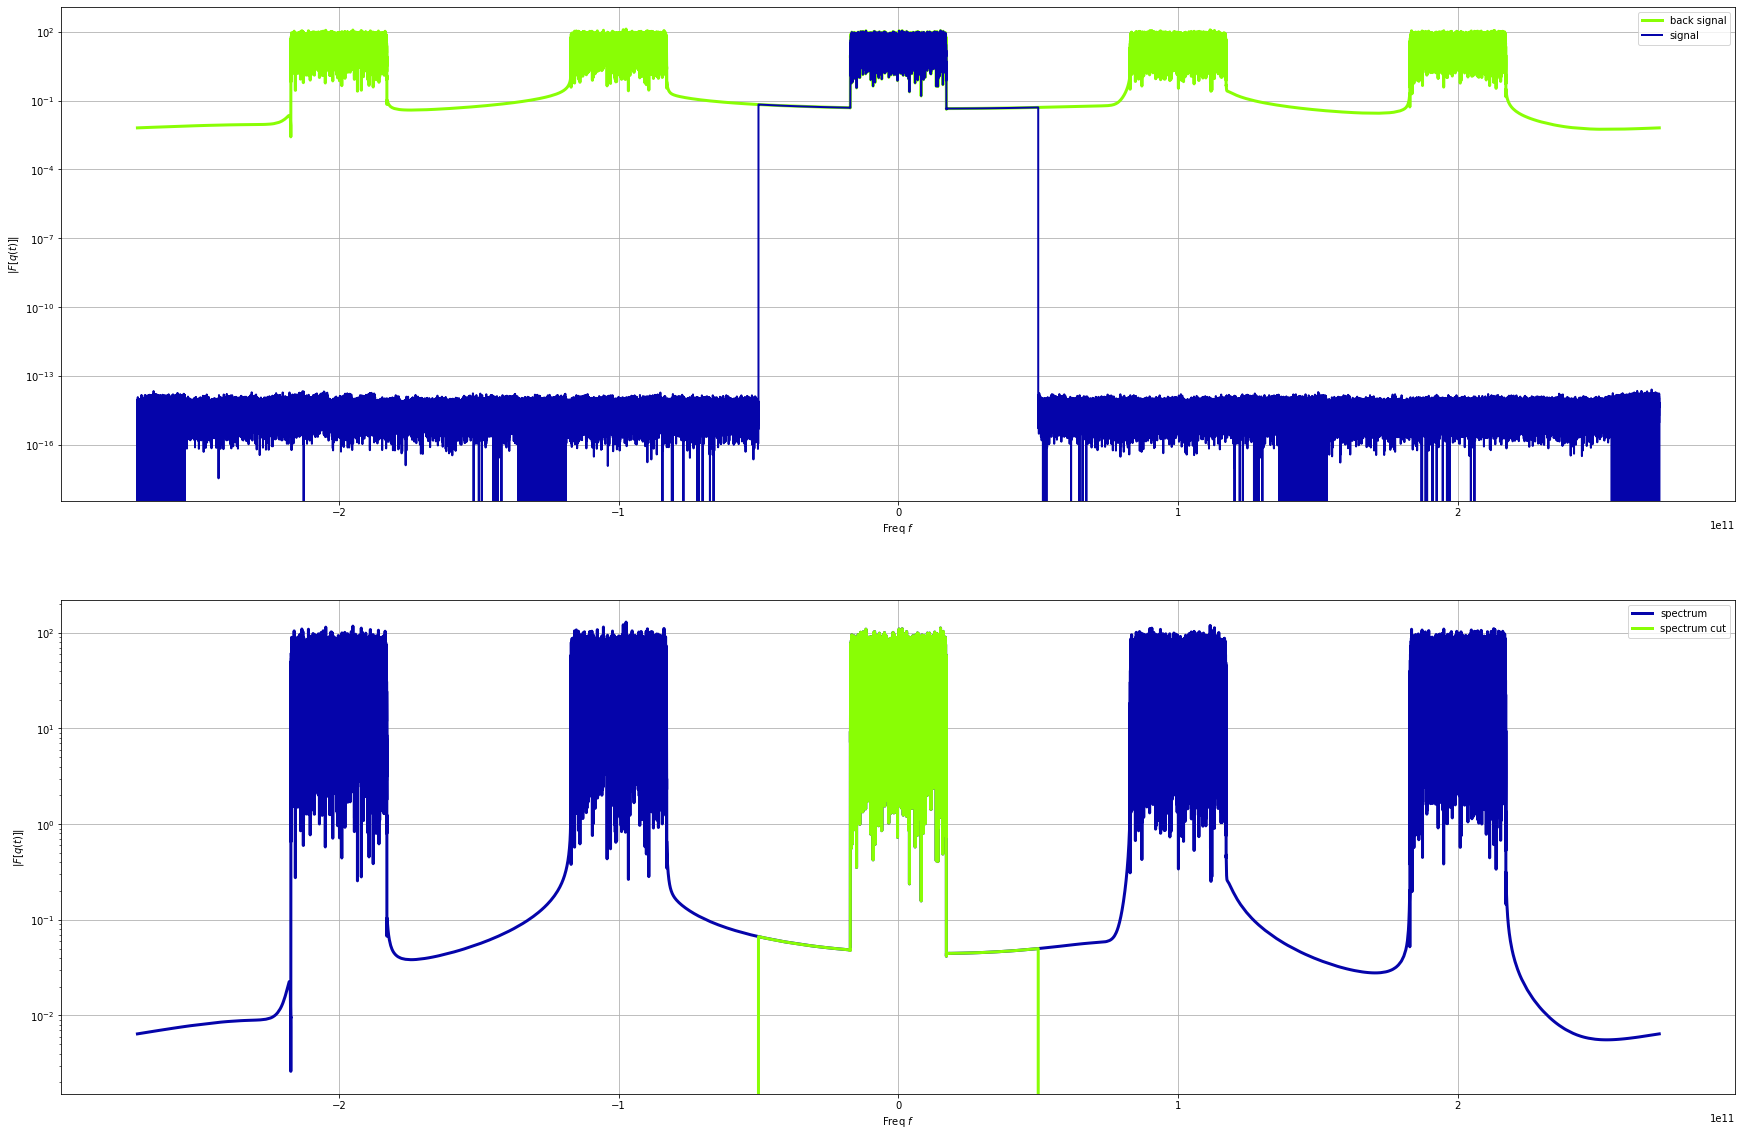

In [110]:
fig, axs = plt.subplots(2, 1, figsize=(30,20))

axs[0].plot(f, np.absolute(spectrum_orig),
               color='xkcd:lime green', linewidth=3,
               label='back signal')
axs[0].plot(f, np.absolute(spec_back),
               color='xkcd:royal blue', linewidth=2,
               label='signal')
axs[0].set_xlabel('Freq $f$')
# axs[0].set_xlim(t[0], t[2048])
# axs[0][0].set_xlim(-t_plot_full_lim, t_plot_full_lim)
axs[0].set_ylabel(r'$|F[q(t)]|$')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(f, np.absolute(spectrum_init),
               color='xkcd:royal blue', linewidth=3,
               label='spectrum')
axs[1].plot(f, np.absolute(spectrum),
               color='xkcd:lime green', linewidth=3,
               label='spectrum cut')
axs[1].set_xlabel('Freq $f$')
# axs[1].set_xlim(t[0], t[2048])
# axs[0][0].set_xlim(-t_plot_full_lim, t_plot_full_lim)
axs[1].set_ylabel(r'$|F[q(t)]|$')
axs[1].set_yscale('log')
axs[1].legend()
axs[1].grid(True)


# End-to-end test

In [130]:
wdm = create_wdm_parameters(n_channels=1,
                            p_ave_dbm=10,
                            n_symbols=2 ** 16,
                            m_order=16,
                            roll_off=0.1,
                            upsampling=4,
                            downsampling_rate=1,
                            symb_freq=34e9,
                            channel_spacing=75e9,
                            n_polarisations=1,
                            seed='fixed')

channel = create_channel_parameters(n_spans=12,
                                    z_span=80,
                                    alpha_db=0.0,
                                    gamma=1.2,
                                    noise_figure_db=-200,  # -200 means there is no noise
                                    dispersion_parameter=16.8,
                                    dz=1)


signal_x, wdm_info = generate_wdm(wdm)
points_x_orig = wdm_info['points_x'][0]
ft_filter_values = wdm_info['ft_filter_values_x'][0] / wdm['upsampling']  # [0] index for only one WDM channel

points_x = get_points_wdm(hpcom.signal.filter_shaper(signal_x, ft_filter_values)[::wdm['downsampling_rate']], wdm) # downsample
shift_factor_x = np.dot(np.transpose(np.conjugate(points_x_orig)), points_x_orig) / np.dot(np.transpose(np.conjugate(points_x_orig)), points_x)
print(shift_factor_x, np.absolute(shift_factor_x))
print('Difference:', np.max(np.absolute(points_x_orig-points_x)))


nt = len(signal_x)
dt = 1. / wdm['sample_freq']
t_span = dt * nt
t = np.arange(-nt / 2, nt / 2) * dt
f = np.arange(-nt / 2, nt / 2) * (1. / t_span)

spectrum = cut_spectrum(tf.signal.fftshift(tf.signal.fft(signal_x)), f, wdm['channel_spacing'])
points_x = get_points_wdm(hpcom.signal.filter_shaper_spectral(spectrum, ft_filter_values)[::wdm['downsampling_rate']], wdm) # downsample
print('Difference:', np.max(np.absolute(points_x_orig-points_x)))

(1.000000000008317-2.711622756505257e-16j) 1.000000000008317
Difference: 3.869902364875791e-10
Difference: 3.869902364875791e-10


In [117]:
wdm = create_wdm_parameters(n_channels=1,
                            p_ave_dbm=3,
                            n_symbols=2 ** 16,
                            m_order=16,
                            roll_off=0.1,
                            upsampling=4,
                            downsampling_rate=1,
                            symb_freq=34e9,
                            channel_spacing=75e9,
                            n_polarisations=2,
                            seed='fixed')

channel = create_channel_parameters(n_spans=12,
                                    z_span=80,
                                    alpha_db=0.0,
                                    gamma=1.2,
                                    noise_figure_db=-200,  # -200 means there is no noise
                                    dispersion_parameter=16.8,
                                    dz=1)


signal_x, signal_y, wdm_info = generate_wdm(wdm)
points_x_orig = wdm_info['points_x'][0]
ft_filter_values = wdm_info['ft_filter_values_x'][0] / wdm['upsampling']  # [0] index for only one WDM channel

points_x = get_points_wdm(hpcom.signal.filter_shaper(signal_x, ft_filter_values)[::wdm['downsampling_rate']], wdm) # downsample
shift_factor_x = np.dot(np.transpose(np.conjugate(points_x_orig)), points_x_orig) / np.dot(np.transpose(np.conjugate(points_x_orig)), points_x)
print(shift_factor_x, np.absolute(shift_factor_x))
print('Difference:', np.max(np.absolute(points_x_orig-points_x)))

(1.0000000000083293-2.692454338161877e-16j) 1.0000000000083293
Difference: 1.222320417237394e-10


# Mutial information

In [7]:
# from hpcom._sklearn_functions import crosstab, mutual_info_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_regression
from scipy.stats.contingency import crosstab
import numpy as np
from datetime import datetime


In [19]:
def calculate_mutual_information(x, y, bins=30):
    joint_prob, _, _ = np.histogram2d(x, y, bins=bins)
    joint_prob /= joint_prob.sum()

    x_prob = np.sum(joint_prob, axis=1)
    y_prob = np.sum(joint_prob, axis=0)

    mi = 0
    for i in range(bins):
        for j in range(bins):
            if joint_prob[i,j] > 0: # to avoid division by zero
                mi += joint_prob[i,j] * np.log2(joint_prob[i,j] / (x_prob[i]*y_prob[j]))
    return mi

from scipy.stats import chi2_contingency

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    pseudocount = 1e-10  # Small constant to avoid zero frequencies
    c_xy += pseudocount
    g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood")
    mi = 0.5 * g / c_xy.sum()
    return mi


def calc_MI_sk(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi


def calc_MI_sk2(x, y):
    c_xy = crosstab(x, y)
    mi = mutual_info_score(None, None, contingency=c_xy[1])
    return mi

In [21]:
# Generate random numbers
np.random.seed(0)
x = np.random.randint(-10, 10+1, 2**18)
y = x + np.random.randint(-5, 5+1, 2**18)
bins = 1000

In [14]:
print(x, y)

[  2   5 -10 ...   2   1  -2] [ 1  8 -8 ...  3  2  1]


In [22]:
# Calculate mutual information
start_time = datetime.now()
mi = calculate_mutual_information(x, y, bins=bins)
print(f"Mutual Information: {mi}")
print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")


start_time = datetime.now()
mi = calc_MI(x, y, bins=bins)
print(f"Mutual Information: {mi}")
print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")


start_time = datetime.now()
mi = calc_MI_sk(x, y, bins=bins)
print(f"Mutual Information: {mi}")
print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")


start_time = datetime.now()
mi = calc_MI_sk2(x, y)
print(f"Mutual Information: {mi}")
print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")


start_time = datetime.now()
mi = mutual_info_score(labels_true=x, labels_pred=y)
print(f"Mutual Information: {mi}")
print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")


start_time = datetime.now()
mi = mutual_info_score(y, x)
print(f"Mutual Information: {mi}")
print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")

start_time = datetime.now()
mi = mutual_info_score(x, x)
print(f"Mutual Information: {mi}")
print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")
#
# # Reshaping the data because mutual_info_regression expects 2D array as input
# x = x.reshape(-1, 1)
# y = y.reshape(-1, 1)
# start_time = datetime.now()
# mi = mutual_info_regression(x, y.flatten())
# print(f"Mutual Information: {mi}")
# print("all took", (datetime.now() - start_time).total_seconds() * 1000, "ms")

Mutual Information: 1.3048341872443863
all took 314.27 ms
Mutual Information: 0.904442145778905
all took 47.455999999999996 ms
Mutual Information: 0.9044421379866734
all took 35.867999999999995 ms
Mutual Information: 0.9044421379866734
all took 29.045 ms
Mutual Information: 0.9044421379866736
all took 42.957 ms
Mutual Information: 0.9044421379866734
all took 38.517 ms
Mutual Information: 3.044468843772368
all took 28.956 ms


# Check WDM model and MI

In [11]:
# create parameters
wdm = create_wdm_parameters(n_channels=3, p_ave_dbm=-20, n_symbols=2 ** 16, m_order=64, roll_off=0.1, upsampling=16,
                            downsampling_rate=1, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2)


channel = create_channel_parameters(n_spans=12,
                                    z_span=80,
                                    alpha_db=0.2,
                                    gamma=1.2,
                                    noise_figure_db=4.5,
                                    dispersion_parameter=16.8,
                                    dz=1)

In [12]:
result = full_line_model_wdm(channel, wdm, channels_type='all', verbose=3)

Average signal power (x / y): 0.0000150 / 0.0000150 (has to be close to 0.0000150)
propagation took 6588.057 ms
Signal energy before propagation (x / y): 3.0307178268418534e-05 3.0379443798653912e-05
Signal energy after propagation (x / y): 0.00021513151504965204 0.00021509580370188486
Signal energy difference (x / y): 0.0001848243367812335 0.00018471635990323094
WDM channel 0
search x and y points took 402.88800000000003 ms
ber for x and y took 475.963 ms
BER (x / y): (0.3588918050130208, 141122) (0.35960133870442706, 141401)
Q^2-factor (x / y): 0.3614225275040791 0.3595246010283536
EVM (x / y): 6.921724791618851 6.960101437864776
MI (x / y): 0.6352354693428754 0.6300291643165599
WDM channel 1
search x and y points took 383.91700000000003 ms
ber for x and y took 476.92 ms
BER (x / y): (0.3608601888020833, 141896) (0.36016082763671875, 141621)
Q^2-factor (x / y): 0.3561604915969929 0.3580289411983906
EVM (x / y): 6.967162173610644 6.951510151009763
MI (x / y): 0.6272101972899435 0.6297

# OFDM generation

In [47]:
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

# from hpcom.signal import create_ofdm_parameters, generate_ofdm_signal, decode_ofdm_signal, dbm_to_mw
# from hpcom.metrics import get_average_power, get_energy

from hpcom.signal import gen_wdm_bit_sequence
from hpcom.modulation import get_constellation_point, get_modulation_type_from_order, get_scale_coef_constellation
from hpcom.channel import create_channel_parameters

import tensorflow as tf

import hpcom
import ssfm_gpu

from importlib import reload
reload(hpcom)

<module 'hpcom' from '/home/esf0/PycharmProjects/hpcom/hpcom/__init__.py'>

Average signal power (x / x): 0.0001996 / 0.0001996 (has to be close to 0.0001995)
propagation
(0.0005579944504721454-5.431682125980105e-05j)


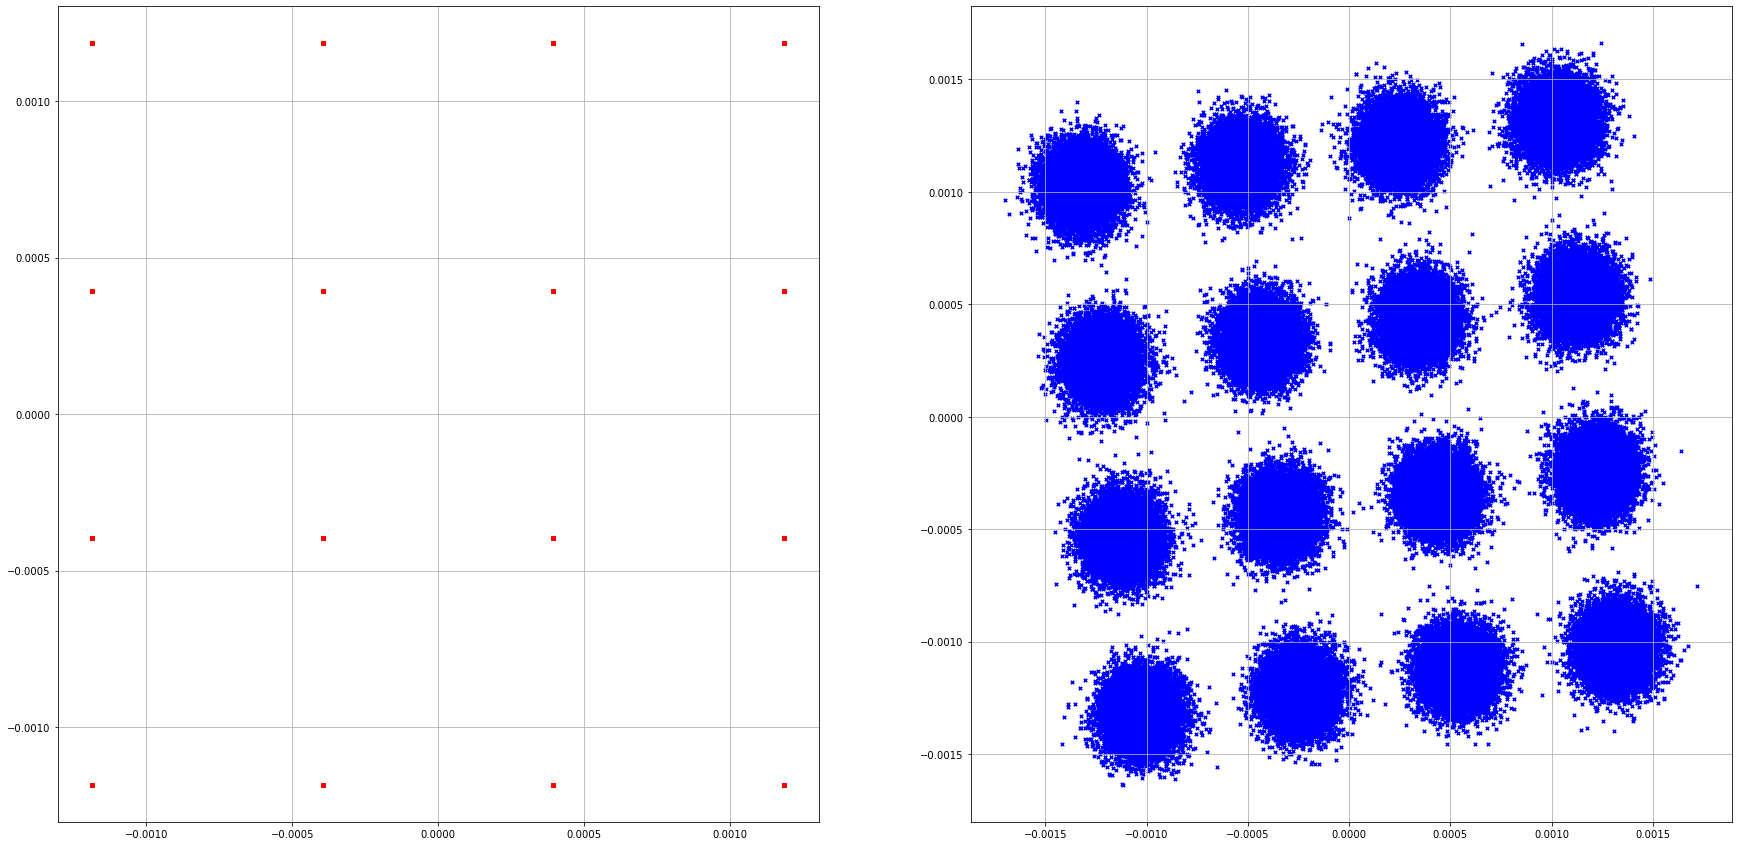

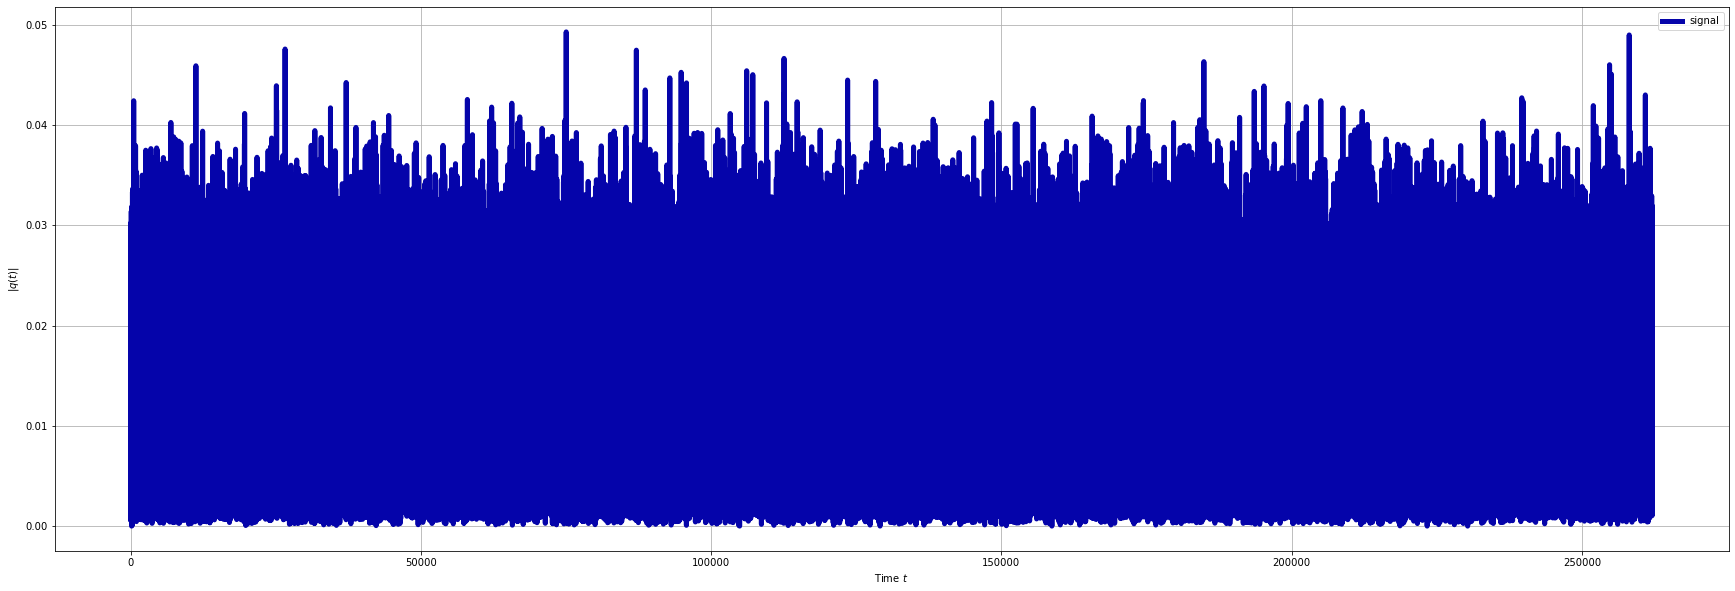

In [71]:
# create parameters
ofdm = hpcom.signal.create_ofdm_parameters(n_carriers=128, p_ave_dbm=-7, n_symbols=2**11, m_order=16,
                                           # symb_freq=34e9,
                                           symb_freq=10e6,
                                           cp_len=0, n_guard=0, n_pilot=0,
                                           n_polarisations=1, seed='time')

channel = create_channel_parameters(n_spans=12,
                                    z_span=80,
                                    alpha_db=0.2,
                                    gamma=1.2,
                                    noise_figure_db=4.5,
                                    dispersion_parameter=16.8,
                                    dz=1)

ofdm_signal, add = generate_ofdm_signal(ofdm)
ofdm_signal = tf.cast(ofdm_signal, tf.complex128)
np_signal = len(ofdm_signal)
dt = 1. / ofdm['symb_freq'] / ofdm['n_carriers']

e_signal = hpcom.metrics.get_energy(ofdm_signal, dt * np_signal)
p_signal_x = hpcom.metrics.get_average_power(ofdm_signal, dt)
p_signal_correct = hpcom.signal.dbm_to_mw(ofdm['p_ave_dbm']) / 1000 / ofdm['n_polarisations']
print("Average signal power (x / x): "
      "%1.7f / %1.7f (has to be close to %1.7f)" % (
      p_signal_x, p_signal_x, p_signal_correct))


ofdm_signal_prop = ssfm_gpu.propagation.propagate_schrodinger(channel, ofdm_signal, sample_freq=int(ofdm['symb_freq'] * ofdm['n_carriers']))
ofdm_signal_prop = ssfm_gpu.propagation.dispersion_compensation(channel, ofdm_signal_prop, dt)
print('propagation')

point_orig = np.array(add['points'])
points = np.array(decode_ofdm_signal(ofdm_signal_prop, ofdm))
print(np.max(points - point_orig))


fig, axs = plt.subplots(1, 2, figsize=(30, 15))
axs[0].scatter(point_orig.real, point_orig.imag, s=12, c='r', marker='x')
axs[0].grid(True)

axs[1].scatter(points.real, points.imag, s=12, c='b', marker='x')
axs[1].grid(True)

plt.show()

fig, axs = plt.subplots(1, 1, figsize=(30,10))
axs.plot(np.absolute(ofdm_signal),
               color='xkcd:royal blue', linewidth=5,
               label='signal')
axs.set_xlabel('Time $t$')
axs.set_ylabel(r'$|q(t)|$')
axs.legend()
axs.grid(True)

plt.show()